In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Chargement de la base de données

In [2]:
data = pd.read_csv("ecg.csv", header = None)

In [3]:
columns_name = ["col_{}".format(i) for i in data.columns]
data.columns = columns_name
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
data.shape

(4998, 141)

In [5]:
X = data.drop(columns=["col_140"]).values
y = data["col_140"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Création du model

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation="sigmoid"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

model(X_train[0:1])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.7939691 , 0.20603094]], dtype=float32)>

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 64)                   9024      
                                                                 
 dense_1 (Dense)             (1, 2)                    130       
                                                                 
Total params: 9,154
Trainable params: 9,154
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss = "sparse_categorical_crossentropy", 
    optimizer = "sgd", # Stochastic gradient descent
    metrics = ["accuracy"])

### Entraînement du model

In [9]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4392 - accuracy: 0.8175 - val_loss: 0.2375 - val_accuracy: 0.9493
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.9636 - val_loss: 0.1574 - val_accuracy: 0.9667
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9706 - val_loss: 0.1265 - val_accuracy: 0.9680
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.9730 - val_loss: 0.1096 - val_accuracy: 0.9680
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9750 - val_loss: 0.0985 - val_accuracy: 0.9693
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9757 - val_loss: 0.0905 - val_accuracy: 0.9707
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9773 - val_loss: 0.0843 - val_accuracy: 0.9720
Epoch 8/10
94/94 [==

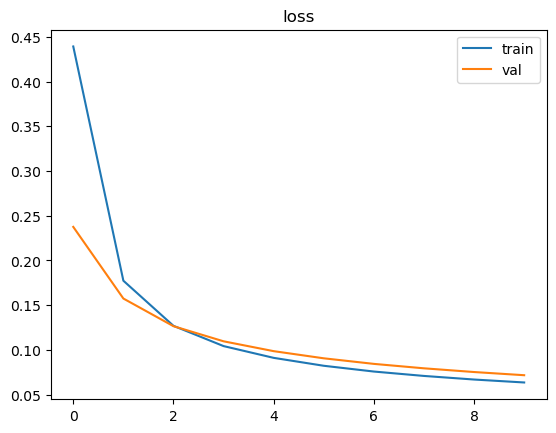

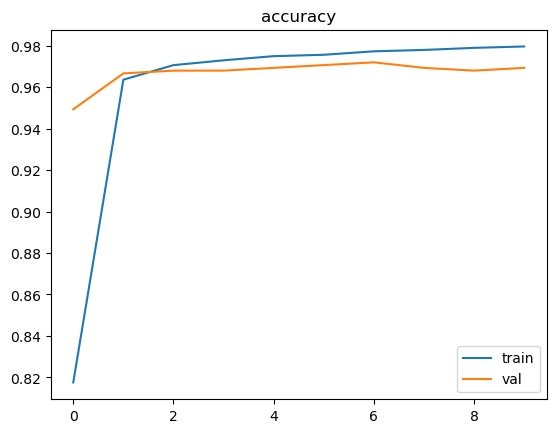

In [10]:
loss_curve = history.history["loss"]
accuracy_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
accuracy_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="train")
plt.plot(loss_val_curve, label="val")
plt.title("loss")
plt.legend()
plt.show()

plt.plot(accuracy_curve, label="train")
plt.plot(accuracy_val_curve, label="val")
plt.title("accuracy")
plt.legend()
plt.show()

In [47]:
model.evaluate(X_test, y_test, batch_size = 25)

50/50 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9752


[0.07456023246049881, 0.9751999974250793]